In [1]:
import pandas as pd

In [2]:
user_df = pd.read_csv('userdetails.csv')

In [3]:
user_df.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [4]:
user_df.shape

(10, 9)

In [5]:
user_df.isnull().sum()

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

In [6]:
user_df.duplicated().sum()

0

In [7]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            10 non-null     object
 1   User Name          10 non-null     object
 2   Age                10 non-null     int64 
 3   Location           10 non-null     object
 4   Registration Date  10 non-null     object
 5   Phone              10 non-null     object
 6   Email              10 non-null     object
 7   Favorite Meal      10 non-null     object
 8   Total Orders       10 non-null     int64 
dtypes: int64(2), object(7)
memory usage: 852.0+ bytes


In [8]:
meal_counts = user_df.groupby('Favorite Meal').size().reset_index(name='Count')


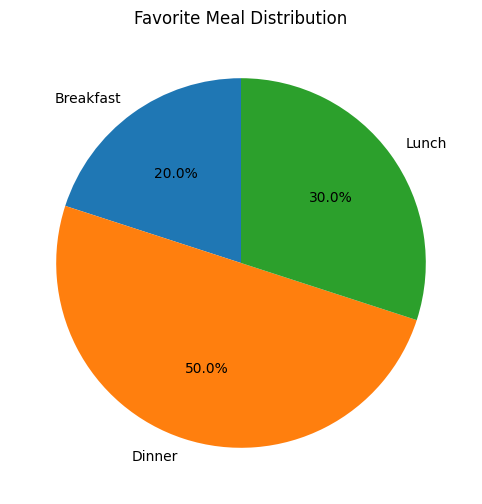

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.pie(meal_counts['Count'], labels=meal_counts['Favorite Meal'], autopct='%1.1f%%', startangle=90)
plt.title("Favorite Meal Distribution")
plt.show()

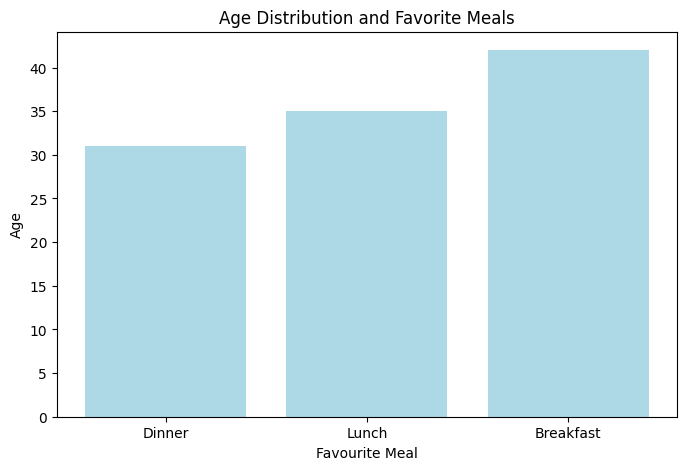

In [58]:
plt.figure(figsize=(8, 5))
plt.bar(user_df['Favorite Meal'], user_df['Age'],color='lightblue')
plt.title('Age Distribution and Favorite Meals')
plt.xlabel('Favourite Meal')
plt.ylabel('Age')
plt.show()

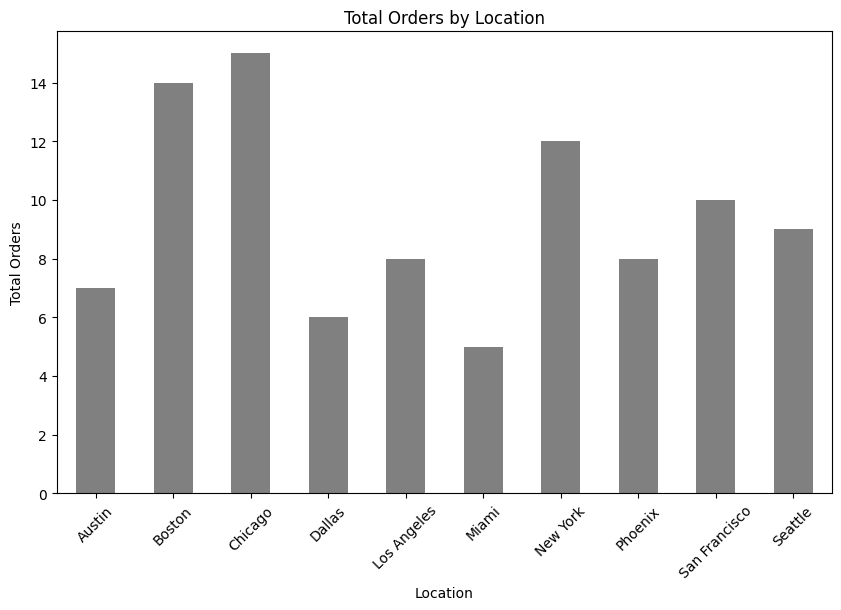

In [56]:
location_orders = user_df.groupby('Location')['Total Orders'].sum()

plt.figure(figsize=(10, 6))
location_orders.plot(kind='bar', color='grey')
plt.title('Total Orders by Location')
plt.xlabel('Location')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()

In [11]:
cooking_df = pd.read_csv("cookingsessions.csv")

In [12]:
cooking_df.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00,2024-12-01 12:20,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30,2024-12-02 20:10,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30,2024-12-02 08:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00,2024-12-03 13:15,15,4.7


In [13]:
cooking_df.shape

(16, 8)

In [14]:
cooking_df.isnull().sum()

Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

In [15]:
cooking_df.duplicated().sum()

0

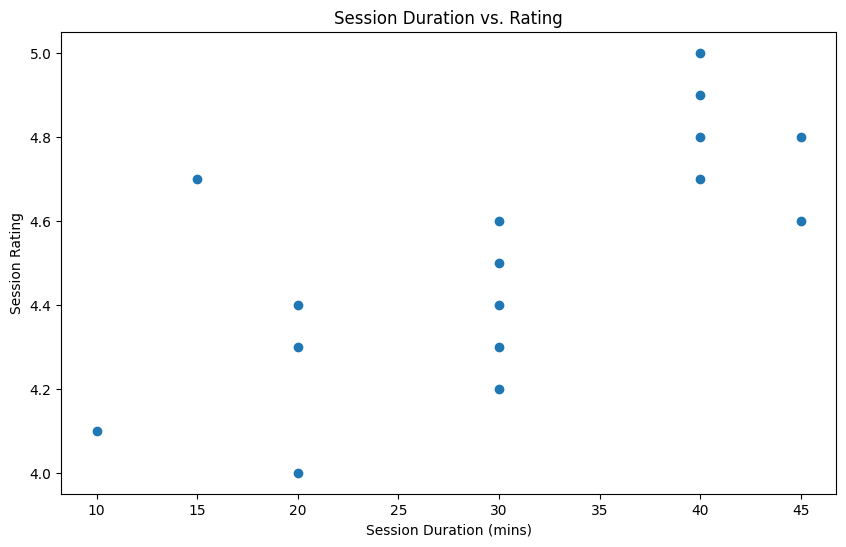

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(cooking_df['Duration (mins)'], cooking_df['Session Rating'])
plt.title('Session Duration vs. Rating')
plt.xlabel('Session Duration (mins)')
plt.ylabel('Session Rating')
plt.show()

<Figure size 1000x600 with 0 Axes>

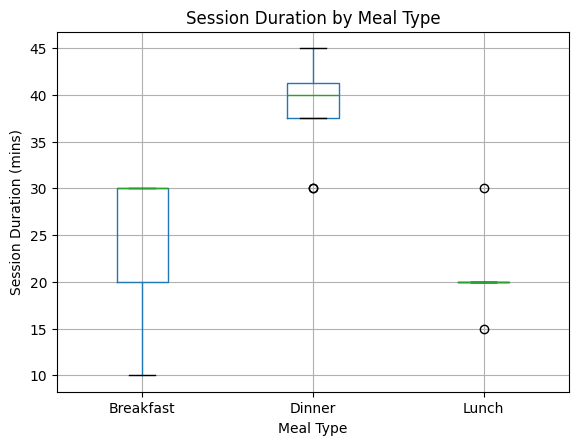

In [17]:
plt.figure(figsize=(10, 6))
cooking_df.boxplot(column='Duration (mins)', by='Meal Type')
plt.title('Session Duration by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Session Duration (mins)')
plt.suptitle('')
plt.show()

In [18]:
order_df= pd.read_csv('orderdetails.csv')

In [19]:
order_df.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [20]:
order_df.shape

(16, 10)

In [21]:
order_df.isnull().sum()

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64

In [22]:
order_df = order_df.dropna(how='any',axis=0)
order_df.dropna(inplace=True)

In [23]:
order_df.isnull().sum()

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          0
Session ID      0
dtype: int64

In [24]:
order_df.duplicated().sum()

0

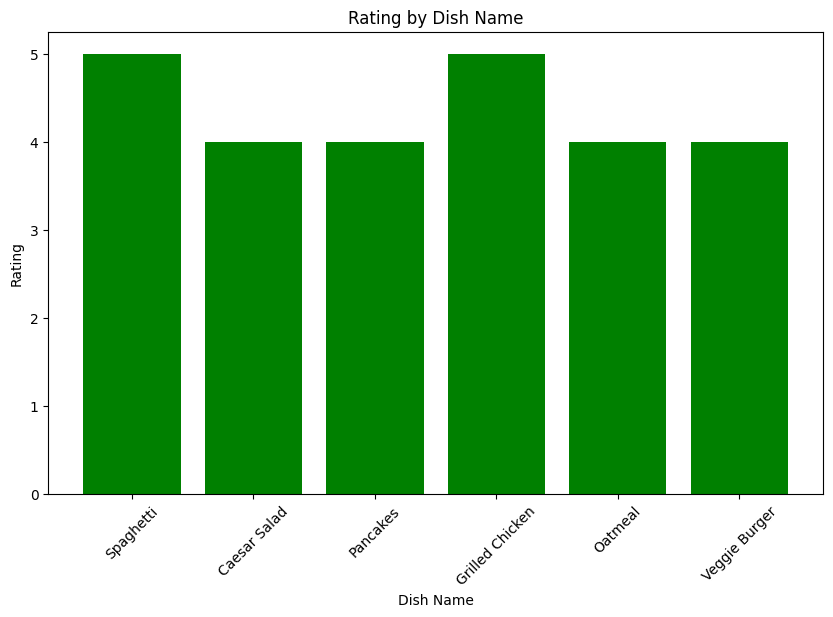

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(order_df['Dish Name'], order_df['Rating'],color = 'green')
plt.xlabel('Dish Name')
plt.ylabel('Rating')
plt.title('Rating by Dish Name')
plt.xticks(rotation=45)
plt.show()

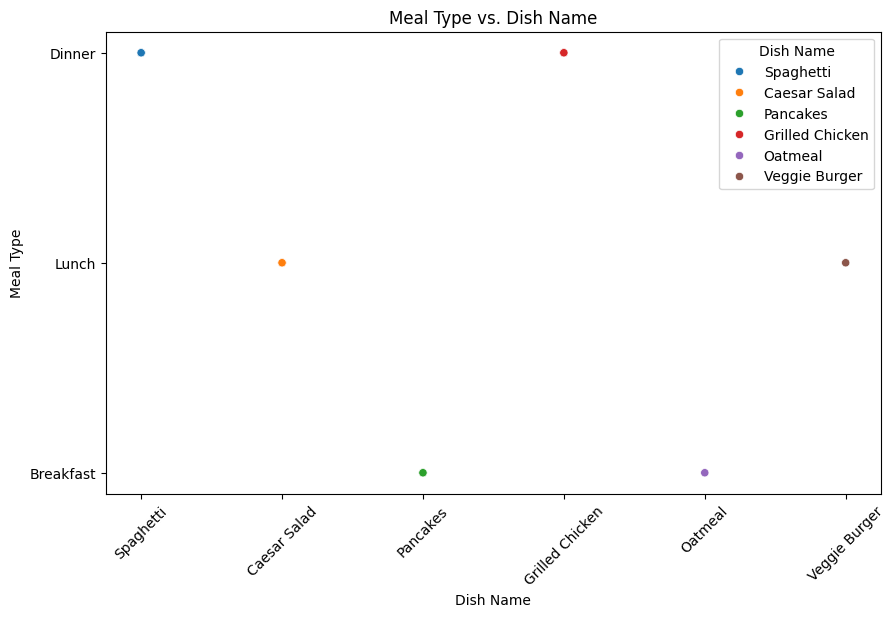

In [26]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dish Name', y='Meal Type', data=order_df, hue='Dish Name')
plt.xlabel('Dish Name')
plt.ylabel('Meal Type')
plt.title('Meal Type vs. Dish Name')
plt.xticks(rotation=45)
plt.show()

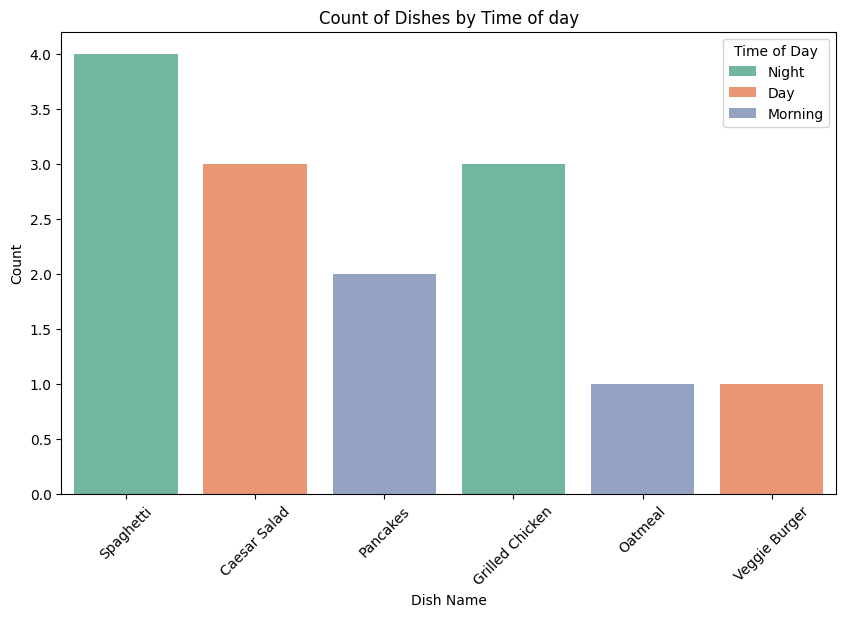

In [54]:
plt.figure(figsize=(10, 6))


sns.countplot(x='Dish Name', hue='Time of Day', data=order_df, palette='Set2' )


plt.title('Count of Dishes by Time of day')
plt.xlabel('Dish Name')
plt.ylabel('Count')
plt.xticks(rotation=45)


plt.show()

In [27]:
merged_df = pd.merge(cooking_df, order_df, on='User ID', how='inner')

In [28]:
merged_df.head()

,Session ID_x,User ID,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating,Session ID_y
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,S001,U001,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
2,S001,U001,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30,2024-12-02 08:00,30,4.2,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
4,S004,U001,Pancakes,Breakfast,2024-12-02 07:30,2024-12-02 08:00,30,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004


In [29]:
merged_df.columns

Index(['Session ID_x', 'User ID', 'Dish Name_x', 'Meal Type_x',
       'Session Start', 'Session End', 'Duration (mins)', 'Session Rating',
       'Order ID', 'Order Date', 'Meal Type_y', 'Dish Name_y', 'Order Status',
       'Amount (USD)', 'Time of Day', 'Rating', 'Session ID_y'],
      dtype='object')

In [30]:
merged_df.isnull().sum()

Session ID_x       0
User ID            0
Dish Name_x        0
Meal Type_x        0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
Order ID           0
Order Date         0
Meal Type_y        0
Dish Name_y        0
Order Status       0
Amount (USD)       0
Time of Day        0
Rating             0
Session ID_y       0
dtype: int64

In [31]:
merged_df.duplicated().sum()

0

In [34]:
cat_cols = merged_df.select_dtypes(include=['string']).columns

In [35]:
cat_cols

Index([], dtype='object')

In [36]:
cat_cols = merged_df.select_dtypes(include=['object']).columns

In [37]:
cat_cols

Index(['Session ID_x', 'User ID', 'Dish Name_x', 'Meal Type_x',
       'Session Start', 'Session End', 'Order Date', 'Meal Type_y',
       'Dish Name_y', 'Order Status', 'Time of Day', 'Session ID_y'],
      dtype='object')

In [38]:
from sklearn.preprocessing import LabelEncoder

In [40]:
en=LabelEncoder()
for i in cat_cols:
    merged_df[i]=en.fit_transform(merged_df[i])

In [41]:
merged_df.head()

,Session ID_x,User ID,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating,Session ID_y
0,0,0,4,1,1,1,30,4.5,1001,0,1,4,0,15.0,2,5.0,0
1,0,0,4,1,1,1,30,4.5,1004,1,0,3,0,8.0,1,4.0,2
2,0,0,4,1,1,1,30,4.5,1009,4,1,1,0,12.0,2,5.0,6
3,3,0,3,0,2,2,30,4.2,1001,0,1,4,0,15.0,2,5.0,0
4,3,0,3,0,2,2,30,4.2,1004,1,0,3,0,8.0,1,4.0,2


<Axes: >

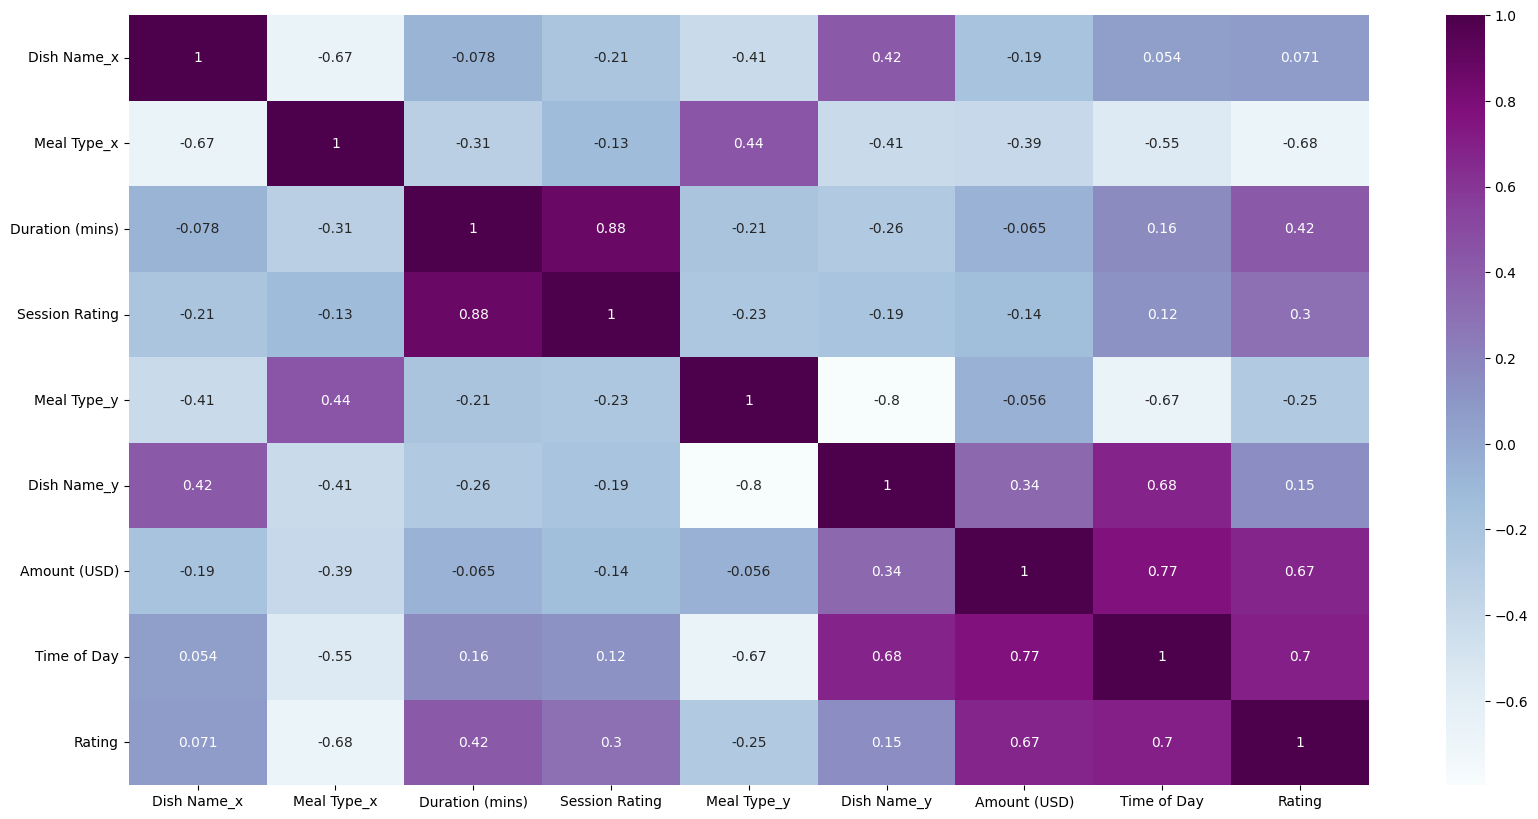

In [45]:
relevant_cols = ['Dish Name_x', 'Meal Type_x', 'Duration (mins)','Session Rating','Meal Type_y','Dish Name_y','Amount (USD)','Time of Day','Rating']
correlation_matrix = merged_df[relevant_cols].corr()
plt.figure(figsize = (20,10))
sns.heatmap(correlation_matrix.corr() , annot = True , cmap = "BuPu")

In [47]:
merged_dff = pd.merge(user_df, cooking_df, on='User ID')
final_merge_df = pd.merge(merged_dff, order_df, on = 'User ID')
final_merge_df.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID_x,...,Session Rating,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating,Session ID_y
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
3,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
4,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004


In [50]:
final_merge_df.columns

Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders', 'Session ID_x', 'Dish Name_x',
       'Meal Type_x', 'Session Start', 'Session End', 'Duration (mins)',
       'Session Rating', 'Order ID', 'Order Date', 'Meal Type_y',
       'Dish Name_y', 'Order Status', 'Amount (USD)', 'Time of Day', 'Rating',
       'Session ID_y'],
      dtype='object')

In [53]:
final_merge_df.isnull().sum()

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
Session ID_x         0
Dish Name_x          0
Meal Type_x          0
Session Start        0
Session End          0
Duration (mins)      0
Session Rating       0
Order ID             0
Order Date           0
Meal Type_y          0
Dish Name_y          0
Order Status         0
Amount (USD)         0
Time of Day          0
Rating               0
Session ID_y         0
dtype: int64